### Import the data

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import train and test data.
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
name=train.Name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data has been split into two groups:
- training set (train.csv)
- test set(test.csv)
<br>

The training set includes passengers survival status and other demographics like gender, class, fare and pclass.
The test set will be used to test how well our models predict the survial rate.
<br><br>

<h4>Variable Definition Key.</h4>
- Survival
 - 0= No
 - 1= Yes
- pclass (Ticket class)
 - 1=1st
 - 2=2nd
 - 3=3rd
 
- sex
<br>

- age


- sibsp (# of siblings / spouses aboard the Titanic)
<br>
- parch (# of parents / children aboard the Titanic)
<br>
- tickets
<br>
- fare
<br>
- cabin
- embarked Port of Embarkation.
 - C = Cherbourg,
 - Q = Queenstown,
 - S = Southampton
- pclass: A proxy for socio-economic status (SES)
<br>
<h4>This is important to remember and will come in handy for later analysis.</h4>
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

<h4>There is a lot of information here but we will mainly focus on the realtionship between class, age, gender, fare and the survial rate.</h4>



## Part 1. Cleaning the data.

In [132]:
## Lets againgtake a quick glance of what we are dealing with.
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
train.shape# Means 891 rows and 12 columns.

(891, 12)

In [134]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [135]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [136]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
Imp=Imputer(missing_values='NaN',strategy='median',axis=1)
new=Imp.fit_transform(train.Age.values.reshape(1,-1))
train['Age'] = new.T
new=Imp.fit_transform(test.Age.values.reshape(1,-1))
test['Age'] = new.T
new=Imp.fit_transform(test.Fare.values.reshape(1,-1))
test['Fare'] = new.T
#Lets drop the old one age Column.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [137]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [139]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [140]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
train.set_index('PassengerId',inplace=True)
test.set_index('PassengerId',inplace=True)
## get dummy variables for Column sex and embarked since they are categorical value.
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)
test = pd.get_dummies(test, columns=["Sex"], drop_first=True)
test = pd.get_dummies(test, columns=["Embarked"], drop_first=True)

#Mapping the data.
train['Fare'] = train['Fare'].astype(int)
train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3

test['Fare'] = test['Fare'].astype(int)
test.loc[test.Fare<=7.91,'Fare']=0
test.loc[(test.Fare>7.91) &(test.Fare<=14.454),'Fare']=1
test.loc[(test.Fare>14.454)&(test.Fare<=31),'Fare']=2
test.loc[(test.Fare>31),'Fare']=3

train['Age']=train['Age'].astype(int)
train.loc[ train['Age'] <= 16, 'Age']= 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[train['Age'] > 64, 'Age'] = 4

test['Age']=test['Age'].astype(int)
test.loc[ test['Age'] <= 16, 'Age']= 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[test['Age'] > 64, 'Age'] = 4

In [142]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,NaN,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,PC 17599,3,C85,0,0,0
3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,0,NaN,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,113803,3,C123,0,0,1
5,0,3,"Allen, Mr. William Henry",2,0,0,373450,1,NaN,1,0,1


In [143]:
# In our data the Ticket and Cabin,Name are the base less,leds to the false prediction so Drop both of them.
train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
test.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,2,0,0,0,1,1,0
893,3,2,1,0,0,0,0,1
894,2,3,0,0,1,1,1,0
895,3,1,0,0,1,1,0,1
896,3,1,1,1,1,0,0,1


In [144]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,1,0,0,1,0,1
2,1,1,2,1,0,3,0,0,0
3,1,3,1,0,0,0,0,0,1
4,1,1,2,1,0,3,0,0,1
5,0,3,2,0,0,1,1,0,1


In [145]:
#Normalize Features
train["Fare"] = (train["Fare"] - train["Fare"].min()) / (train["Fare"].max() - train["Fare"].min())
train["Age"] = (train["Age"] - train["Age"].min()) / (train["Age"].max() - train["Age"].min())
train["Pclass"] = (train["Pclass"] - train["Pclass"].min()) / (train["Pclass"].max() - train["Pclass"].min())
train["Parch"] = (train["Parch"] - train["Parch"].min()) / (train["Parch"].max() - train["Parch"].min())
train["SibSp"] = (train["SibSp"] - train["SibSp"].min()) / (train["SibSp"].max() - train["SibSp"].min())

test["Fare"] = (test["Fare"] - test["Fare"].min()) / (test["Fare"].max() - test["Fare"].min())
test["Age"] = (test["Age"] - test["Age"].min()) / (test["Age"].max() - test["Age"].min())
test["Pclass"] = (test["Pclass"] - test["Pclass"].min()) / (test["Pclass"].max() - test["Pclass"].min())
test["Parch"] = (test["Parch"] - test["Parch"].min()) / (test["Parch"].max() - test["Parch"].min())
test["SibSp"] = (test["SibSp"] - test["SibSp"].min()) / (test["SibSp"].max() - test["SibSp"].min())

<h2 >Exploratory Data Analysis</h2>.

**Exploratory data analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.


In [146]:
train.shape
# 891 rows and 9 columns.

(891, 9)

In [147]:
train.Survived.value_counts()/len(train)*100
#This signifies almost 61% people in the ship died and 38% survived.

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [148]:
train.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,,,,,,,,
0,0.765938,0.329235,0.069217,0.054948,0.395264,0.852459,0.085610,0.777778
1,0.475146,0.310673,0.059211,0.077485,0.627680,0.318713,0.087719,0.634503


In [149]:
train.groupby('Sex_male').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.742038,0.579618,0.302548,0.086783,0.108280,0.605096,0.114650,0.646497
1,0.188908,0.694974,0.332756,0.053726,0.039284,0.418833,0.071057,0.764298


In [150]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.044492,-0.035322,0.081629,0.301792,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.358005,0.083081,0.018443,-0.660699,0.131900,0.221009,0.081720
Age,-0.044492,-0.358005,1.000000,-0.218846,-0.134014,0.113812,0.071125,-0.079779,0.016203
SibSp,-0.035322,0.083081,-0.218846,1.000000,0.414838,0.365893,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.134014,0.414838,1.000000,0.363097,-0.245489,-0.081228,0.063036
Fare,0.301792,-0.660699,0.113812,0.365893,0.363097,1.000000,-0.237585,-0.227213,-0.035715
Sex_male,-0.543351,0.131900,0.071125,-0.114631,-0.245489,-0.237585,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.079779,-0.026354,-0.081228,-0.227213,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.016203,0.070941,0.063036,-0.035715,0.125722,-0.496624,1.000000


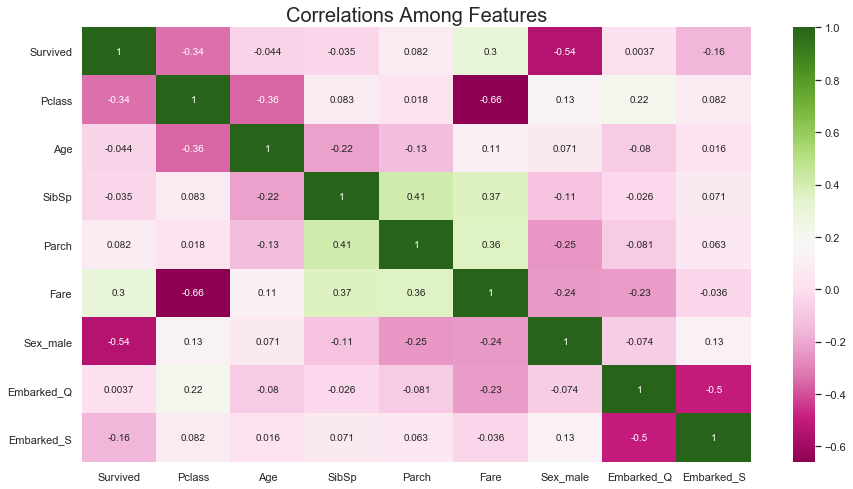

In [151]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

**Gender and Survived**


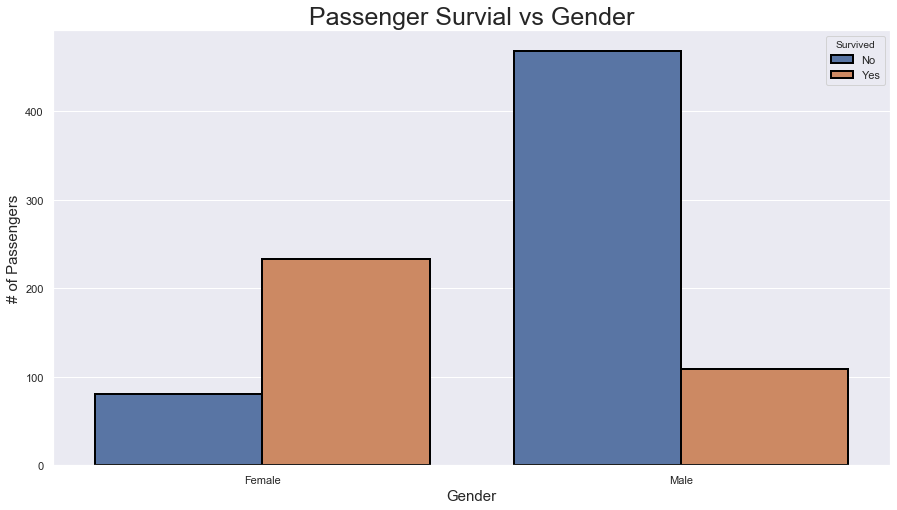

In [152]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger Survial vs Gender',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passengers", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(train.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')


In [153]:
train.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,1.0,0.25,0.125,0.0,0.0,1,0,1
2,1,0.0,0.50,0.125,0.0,1.0,0,0,0
3,1,1.0,0.25,0.000,0.0,0.0,0,0,1
4,1,0.0,0.50,0.125,0.0,1.0,0,0,1


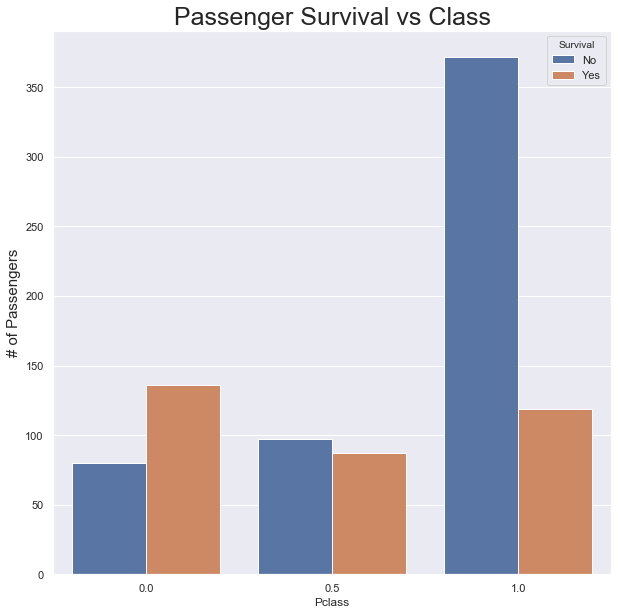

In [154]:
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Survival vs Class", fontsize = 25)
plt.ylabel("# of Passengers", fontsize = 15)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("Yes")

**Fare and Survived**

Text(0.5, 0, 'Fare')

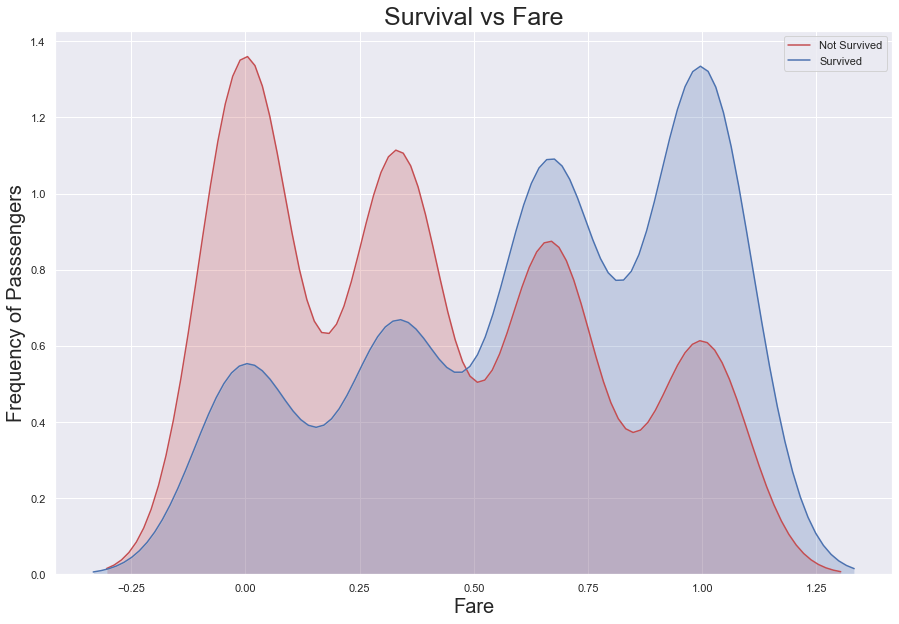

In [155]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Survival vs Fare',fontsize=25)
plt.ylabel('Frequency of Passsengers',fontsize=20)
plt.xlabel('Fare',fontsize=20)

<h2>Classifier Comparision</h2>

Scikit-learn has a library called Classifier Comparison  which will allow us to choose which model best for the given data.

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 


classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver="lbfgs")]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [157]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

X, y = train.iloc[:, 1:], train.iloc[:, :1]

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train.values.ravel())
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict,normalize=True)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

Text(0.5, 1.0, 'Classifier Accuracy')

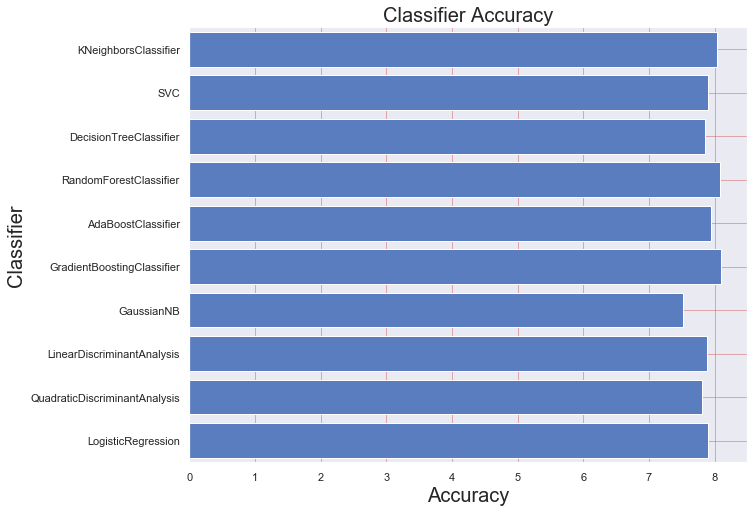

In [158]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)


<h3>Support Vector Classifier</h3>

In [159]:
parameterCandidates = [
    {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], "gamma":["auto"], "kernel":["rbf"], "probability":[True, False]},
    {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], "gamma":["auto"], "degree":[1, 2, 3, 4, 5], "kernel":["poly"], "probability":[True, False]},
    {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], "gamma":["auto"], "kernel":["sigmoid"], "probability":[True, False]},
    {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000.0], "gamma":["auto"], "kernel":["linear"], "probability":[True, False]}
]

grid = GridSearchCV(SVC(), parameterCandidates, refit=True, verbose=2, scoring="accuracy")
grid.fit(train.iloc[:, 1:], train.iloc[:, :1].values.ravel())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] C=0.0001, gamma=auto, kernel=rbf, probability=True ..............
[CV]  C=0.0001, gamma=auto, kernel=rbf, probability=True, total=   0.0s
[CV] C=0.0001, gamma=auto, kernel=rbf, probability=True ..............
[CV]  C=0.0001, gamma=auto, kernel=rbf, probability=True, total=   0.0s
[CV] C=0.0001, gamma=auto, kernel=rbf, probability=True ..............
[CV]  C=0.0001, gamma=auto, kernel=rbf, probability=True, total=   0.0s
[CV] C=0.0001, gamma=auto, kernel=rbf, probability=False .............
[CV]  C=0.0001, gamma=auto, kernel=rbf, probability=False, total=   0.0s
[CV] C=0.0001, gamma=auto, kernel=rbf, probability=False .............
[CV]  C=0.0001, gamma=auto, kernel=rbf, probability=False, total=   0.0s
[CV] C=0.0001, gamma=auto, kernel=rbf, probability=False .............
[CV]  C=0.0001, gamma=auto, kernel=rbf, probability=False, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=rbf, probability=True ...............
[CV] 

[CV]  C=0.0001, degree=4, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=0.0001, degree=4, gamma=auto, kernel=poly, probability=True ...
[CV]  C=0.0001, degree=4, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=0.0001, degree=4, gamma=auto, kernel=poly, probability=True ...
[CV]  C=0.0001, degree=4, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=0.0001, degree=4, gamma=auto, kernel=poly, probability=False ..
[CV]  C=0.0001, degree=4, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=0.0001, degree=4, gamma=auto, kernel=poly, probability=False ..
[CV]  C=0.0001, degree=4, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=0.0001, degree=4, gamma=auto, kernel=poly, probability=False ..
[CV]  C=0.0001, degree=4, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=0.0001, degree=5, gamma=auto, kernel=poly, probability=True ...
[CV]  C=0.0001, degree=5, gamma=auto, kernel=poly, probability=True, tota

[CV]  C=0.01, degree=3, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=0.01, degree=3, gamma=auto, kernel=poly, probability=False ....
[CV]  C=0.01, degree=3, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=0.01, degree=3, gamma=auto, kernel=poly, probability=False ....
[CV]  C=0.01, degree=3, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=0.01, degree=3, gamma=auto, kernel=poly, probability=False ....
[CV]  C=0.01, degree=3, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=0.01, degree=4, gamma=auto, kernel=poly, probability=True .....
[CV]  C=0.01, degree=4, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=0.01, degree=4, gamma=auto, kernel=poly, probability=True .....
[CV]  C=0.01, degree=4, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=0.01, degree=4, gamma=auto, kernel=poly, probability=True .....
[CV]  C=0.01, degree=4, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV]

[CV]  C=1.0, degree=3, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=poly, probability=False .....
[CV]  C=1.0, degree=3, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=poly, probability=False .....
[CV]  C=1.0, degree=3, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=1.0, degree=3, gamma=auto, kernel=poly, probability=False .....
[CV]  C=1.0, degree=3, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=1.0, degree=4, gamma=auto, kernel=poly, probability=True ......
[CV]  C=1.0, degree=4, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=1.0, degree=4, gamma=auto, kernel=poly, probability=True ......
[CV]  C=1.0, degree=4, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=1.0, degree=4, gamma=auto, kernel=poly, probability=True ......
[CV]  C=1.0, degree=4, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=1.0,

[CV]  C=100.0, degree=3, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=100.0, degree=3, gamma=auto, kernel=poly, probability=True ....
[CV]  C=100.0, degree=3, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=100.0, degree=3, gamma=auto, kernel=poly, probability=True ....
[CV]  C=100.0, degree=3, gamma=auto, kernel=poly, probability=True, total=   0.0s
[CV] C=100.0, degree=3, gamma=auto, kernel=poly, probability=False ...
[CV]  C=100.0, degree=3, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=100.0, degree=3, gamma=auto, kernel=poly, probability=False ...
[CV]  C=100.0, degree=3, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=100.0, degree=3, gamma=auto, kernel=poly, probability=False ...
[CV]  C=100.0, degree=3, gamma=auto, kernel=poly, probability=False, total=   0.0s
[CV] C=100.0, degree=4, gamma=auto, kernel=poly, probability=True ....
[CV]  C=100.0, degree=4, gamma=auto, kernel=poly, probability=True, total=   0.

[CV]  C=0.001, gamma=auto, kernel=sigmoid, probability=True, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=sigmoid, probability=False ..........
[CV]  C=0.001, gamma=auto, kernel=sigmoid, probability=False, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=sigmoid, probability=False ..........
[CV]  C=0.001, gamma=auto, kernel=sigmoid, probability=False, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=sigmoid, probability=False ..........
[CV]  C=0.001, gamma=auto, kernel=sigmoid, probability=False, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=sigmoid, probability=True ............
[CV]  C=0.01, gamma=auto, kernel=sigmoid, probability=True, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=sigmoid, probability=True ............
[CV]  C=0.01, gamma=auto, kernel=sigmoid, probability=True, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=sigmoid, probability=True ............
[CV]  C=0.01, gamma=auto, kernel=sigmoid, probability=True, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=sigmoid, probabil

[CV]  C=0.1, gamma=auto, kernel=linear, probability=False, total=   0.0s
[CV] C=1.0, gamma=auto, kernel=linear, probability=True ..............
[CV]  C=1.0, gamma=auto, kernel=linear, probability=True, total=   0.0s
[CV] C=1.0, gamma=auto, kernel=linear, probability=True ..............
[CV]  C=1.0, gamma=auto, kernel=linear, probability=True, total=   0.0s
[CV] C=1.0, gamma=auto, kernel=linear, probability=True ..............
[CV]  C=1.0, gamma=auto, kernel=linear, probability=True, total=   0.0s
[CV] C=1.0, gamma=auto, kernel=linear, probability=False .............
[CV]  C=1.0, gamma=auto, kernel=linear, probability=False, total=   0.0s
[CV] C=1.0, gamma=auto, kernel=linear, probability=False .............
[CV]  C=1.0, gamma=auto, kernel=linear, probability=False, total=   0.0s
[CV] C=1.0, gamma=auto, kernel=linear, probability=False .............
[CV]  C=1.0, gamma=auto, kernel=linear, probability=False, total=   0.0s
[CV] C=10.0, gamma=auto, kernel=linear, probability=True .........

[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed:  1.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'gamma': ['auto'], 'kernel': ['rbf'], 'probability': [True, False]}, {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'gamma': ['auto'], 'degree': [1, 2, 3, 4, 5], 'kernel': ['poly'], 'probability': [True, False]}, {'....1, 1.0, 10.0, 100, 1000.0], 'gamma': ['auto'], 'kernel': ['linear'], 'probability': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [160]:
best = grid.best_estimator_
pred = best.predict(train.iloc[:, 1:])
print(accuracy_score(train.iloc[:, :1], pred))
grid.best_score_ #Cross-Validation Score

0.8439955106621774


0.8226711560044894

<h3>K-Nearest Neighbors</h3>

In [161]:
n_neighbors = list(range(1,15))
p=[1,2]

parameterCandidates = dict(n_neighbors=n_neighbors, p=p)

grid = GridSearchCV(KNeighborsClassifier(), parameterCandidates, refit=True, verbose=2, scoring="accuracy")
grid.fit(train.iloc[:, 1:], train.iloc[:, :1].values.ravel())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ............................... n_neighbors=1, p=2, total=   0.0s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ............................... n_neighbors=1, p=2, total=   0.0s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ............................... n_neighbors=1, p=2, total=   0.0s
[CV] n_neighbors=2, p=1 ..............................................
[CV] ...........

[CV] .............................. n_neighbors=11, p=1, total=   0.0s
[CV] n_neighbors=11, p=1 .............................................
[CV] .............................. n_neighbors=11, p=1, total=   0.0s
[CV] n_neighbors=11, p=2 .............................................
[CV] .............................. n_neighbors=11, p=2, total=   0.0s
[CV] n_neighbors=11, p=2 .............................................
[CV] .............................. n_neighbors=11, p=2, total=   0.0s
[CV] n_neighbors=11, p=2 .............................................
[CV] .............................. n_neighbors=11, p=2, total=   0.0s
[CV] n_neighbors=12, p=1 .............................................
[CV] .............................. n_neighbors=12, p=1, total=   0.0s
[CV] n_neighbors=12, p=1 .............................................
[CV] .............................. n_neighbors=12, p=1, total=   0.0s
[CV] n_neighbors=12, p=1 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    2.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [162]:
bestKNN = grid.best_estimator_
pred = bestKNN.predict(train.iloc[:, 1:])
print(accuracy_score(train.iloc[:, :1], pred))
grid.best_score_ #Cross-Validation Score

0.8484848484848485


0.8047138047138047

<h3>Logistic Regression</h3>

In [163]:
p = ["l1", "l2"]
C = list(10**x for x in range(-5, 5))
parameterCandidates = [
    {'C':C, "solver":["lbfgs"], "penalty":[p[1]]},
    {'C':C, "solver":["liblinear"], "penalty":p[0:]},
    {'C':C, "solver":["saga"], "penalty":[p[1]]},
    {'C':C, "solver":["newton-cg"], "penalty":[p[1]]}
]
grid = GridSearchCV(LogisticRegression(), parameterCandidates, refit=True, verbose=2, scoring="accuracy")
grid.fit(train.iloc[:, 1:], train.iloc[:, :1].values.ravel())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=1e-05, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=1e-05, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1e-05, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=1e-05, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1e-05, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=1e-05, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=lbfgs ..............................
[CV] ............... C=0.0001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=lbfgs ..............................
[CV] ............... C=0.0001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=lbfgs ..............................
[CV] ............... C=0.0001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ..........

[CV] ............... C=10, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ............... C=10, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ............... C=10, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .............. C=100, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .

[CV] ............. C=1000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................
[CV] ............ C=10000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................
[CV] ............ C=10000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................
[CV] ............ C=10000, penalty=l2, solver=newton-cg, total=   0.0s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'solver': ['lbfgs'], 'penalty': ['l2']}, {'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'solver': ['liblinear'], 'penalty': ['l1', 'l2']}, {'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'solver': ['saga'], 'penalty': ['l2']}, {'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'solver': ['newton-cg'], 'penalty': ['l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [164]:
bestLogReg = grid.best_estimator_
pred = bestLogReg.predict(train.iloc[:, 1:])
print(accuracy_score(train.iloc[:, :1], pred))
grid.best_score_ #Cross-Validation Score

0.792368125701459


0.7867564534231201

In [165]:
test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [166]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,1.0,0.50,0.000,0.000000,0.000000,1,1,0
893,1.0,0.50,0.125,0.000000,0.000000,0,0,1
894,0.5,0.75,0.000,0.000000,0.333333,1,1,0
895,1.0,0.25,0.000,0.000000,0.333333,1,0,1
896,1.0,0.25,0.125,0.111111,0.333333,0,0,1


In [167]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,1.0,0.25,0.125,0.0,0.000000,1,0,1
2,1,0.0,0.50,0.125,0.0,1.000000,0,0,0
3,1,1.0,0.25,0.000,0.0,0.000000,0,0,1
4,1,0.0,0.50,0.125,0.0,1.000000,0,0,1
5,0,1.0,0.50,0.000,0.0,0.333333,1,0,1


In [168]:
svcPrediction = best.predict(test).reshape(-1, 1)
knnPrediction = bestKNN.predict(test).reshape(-1, 1)
logRegPrediction = bestLogReg.predict(test).reshape(-1, 1)

In [169]:
svcPrediction.shape

(418, 1)

In [170]:
test.reset_index(inplace=True)
svcPrediction = pd.concat((test["PassengerId"], pd.DataFrame(svcPrediction, columns=["Survived"])), axis=1)
knnPrediction = pd.concat((test["PassengerId"], pd.DataFrame(knnPrediction, columns=["Survived"])), axis=1)
logRegPrediction = pd.concat((test["PassengerId"], pd.DataFrame(logRegPrediction, columns=["Survived"])), axis=1)

In [171]:
svcPrediction.set_index('PassengerId',inplace=True)
knnPrediction.set_index('PassengerId',inplace=True)
logRegPrediction.set_index('PassengerId',inplace=True)

In [172]:
svcPrediction.to_csv("svcPrediction.csv")
knnPrediction.to_csv("knnPrediction.csv")
logRegPrediction.to_csv("logRegPrediction.csv")